## 180280116040 Dharmistha Kosti

# Practical:-6

### **AIM: Demonstrate using suitable data using Matplotlib, Seaborn Library. Describe the Problem and Prepare suitable visualization for each type of plot.**

### Here are the Visualization We’ll Design using matplotlib

1. Bar Graph
2. Pie Chart
3. Box Plot
4. Histogram
5. Line Chart and Subplots
6. Scatter Plot
7. HeatMap
8. Pair Plot
9. Relational Plot
10. Word Cloud

### Understanding the Dataset and the Problem Statement
Before we get into the different visualizations and chart types, I want to spend a few minutes understanding the data. This is a critical part of the machine learning pipeline and we should pay full attention to it.

We will be analyzing the Food Demand Forecasting project in this matplotlib tutorial. The aim of this project is to predict the number of food orders that customers will place in the upcoming weeks with the company. We will, of course, only spend time on the exploration stage of the project.

Let us first import the relevant libraries:

In [1]:
import pandas as pd 
import numpy as np 
import sys
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn')

In [2]:
df_meal = pd.read_csv(r'C:\Users\HP\Downloads\dataset\meal_info.csv') 
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [3]:
df_center = pd.read_csv(r'C:\Users\HP\Downloads\dataset\fulfilment_center_info.csv') 
df_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [4]:
df_food = pd.read_csv(r'C:\Users\HP\Downloads\dataset\train.csv') 
df_food.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


I will first merge all the three dataframes into a single dataframe. This will make it easier to manipulate the data while plotting it:

In [5]:
df = pd.merge(df_food,df_center,on='center_id') 
df = pd.merge(df,df_meal,on='meal_id')

Right – now let’s jump into the different chart types we can create using matplotlib in Python!

### 1. Bar Graph using matplotlib
First, we want to find the most popular food item that customers have bought from the company.

I will be using the Pandas pivot_table function to find the total number of orders for each category of the food item:

In [14]:
table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
table

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959
Other Snacks,4766293
Pasta,1637744
Pizza,7383720
Rice Bowl,20874063


Next, I will try to visualize this using a bar graph.

Bar graph is generated using plt.bar() in matplotlib:

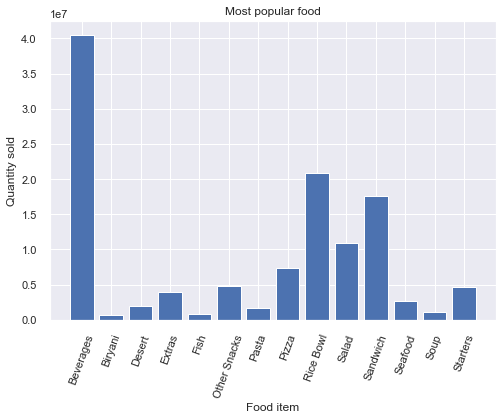

In [15]:
#bar graph
plt.bar(table.index,table['num_orders'])

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('Food item') 

#y-axis labels 
plt.ylabel('Quantity sold') 

#plot title 
plt.title('Most popular food') 

#display 
plt.show();

It is always important to label your axis. You can do this by employing the plt.xlabel() and plt.ylabel() functions. You can use plt.title() for naming the title of the plot. If your xticks are overlapping, rotate them using the rotate parameter in plt.xticks() so that they are easy to view for the audience.

You can save your plot using the plt.savefig() function by providing the file path as a parameter. Finally, always display your plot using plt.show().

While analyzing the plot, we can see that Beverages were the most popular food item sold by the company. Wait, was it because they were sold with almost all the meals? Was Rice Bowl the most popular food item?

Let’s divide the total food item order by the number of unique meals it is present in.

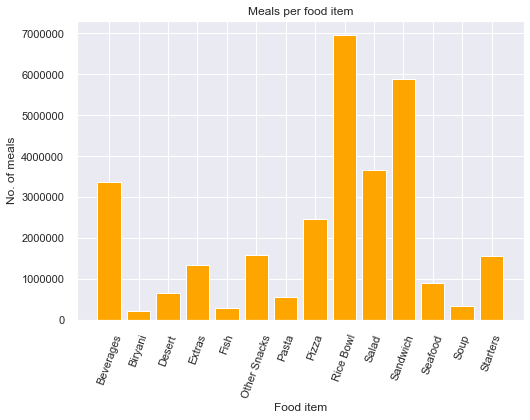

In [16]:
#dictionary for meals per food item
item_count = {}

for i in range(table.index.nunique()):
    item_count[table.index[i]] = table.num_orders[i]/df_meal[df_meal['category']==table.index[i]].shape[0]

#bar plot 
plt.bar([x for x in item_count.keys()],[x for x in item_count.values()],color='orange')

#adjust xticks
plt.xticks(rotation=70)

#label x-axis
plt.xlabel('Food item')

#label y-axis
plt.ylabel('No. of meals')

#label the plot
plt.title('Meals per food item')

#display plot
plt.show();

Yes, our hypothesis was correct! Rice Bowl was indeed the most popular food item sold by the company.

### 2. Pie Chart using matplotlib
Let us now see the ratio of orders from each cuisine

In [18]:
#dictionary for cuisine and its total orders
d_cuisine = {}

#total number of order
total = df['num_orders'].sum()

#find ratio of orders per cuisine
for i in range(df['cuisine'].nunique()):

#cuisine
 c = df['cuisine'].unique()[i]

#num of orders for the cuisine
c_order = df[df['cuisine']==c]['num_orders'].sum()
d_cuisine[c] = c_order/total

Let’s plot the pie chart:

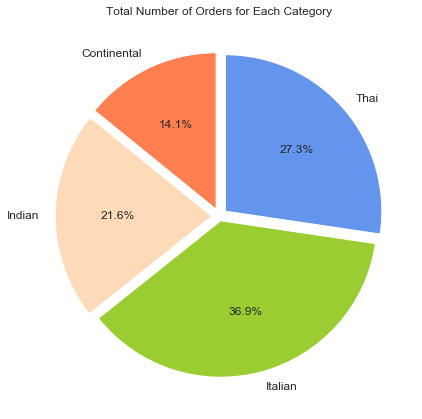

In [19]:
plt.figure(figsize=(6,6))
colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
plt.pie(df.groupby(['cuisine']).num_orders.sum(),
    labels=df.groupby(['cuisine']).num_orders.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03,0.05),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of Orders for Each Category')
plt.tight_layout()
plt.show()

Italian Cuisine has the highest number of orders with Continental cuisine being the least.

- I used plt.pie() to draw the pie chart and adjust its parameters to make it more appealing
- The autopct parameter was used to print the values within the pie chart up to 1 decimal place
- The explode parameter was used to offset the Italian wedge to make it stand out from the rest. This makes it instantly clear to the viewer that people love Italian food!

### 3. Box Plot using matplotlib

Since we are discussing cuisine, let’s check out which one is the most expensive cuisine! For this, I will be using a Box Plot.
- The lower, middle and upper part of the box represents the 25th, 50th, and 75th percentile values respectively
- The top whisker represents Q3+1.5*IQR
- The bottom whisker represents Q1-1.5*IQR
- Outliers are shown as scatter points
- Shows skewness in the data

In [20]:
#dictionary for base price per cuisine
c_price = {}
for i in df['cuisine'].unique():
    c_price[i] = df[df['cuisine']==i].base_price

Plotting the boxplot below:

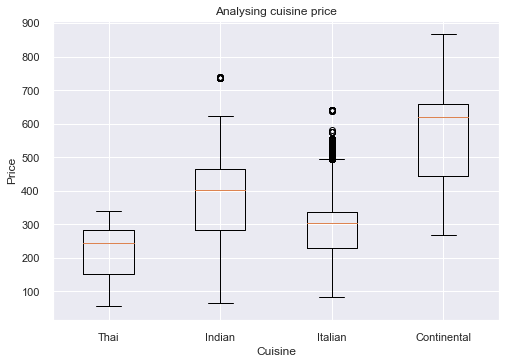

In [21]:
#plotting boxplot 
plt.boxplot([x for x in c_price.values()],labels=[x for x in c_price.keys()]) 

#x and y-axis labels 
plt.xlabel('Cuisine') 
plt.ylabel('Price') 

#plot title 
plt.title('Analysing cuisine price') 

#display 
plt.show();

Continental cuisine was the most expensive cuisine served by the company! Even its median price is higher than the maximum price of all the cuisines.

### 4. Histogram using matplotlib

On the topic of prices, did we forget to inspect the base price and checkout price? Don’t worry, we will do that using a histogram.
Since base_price is a continuous variable, we will inspect its range in different distinct orders using a histogram. We can do this using plt.hist().

But the confusing part is what should be the number of bins? By default, it is 10. However, there is no correct answer and you can vary it according to your dataset to best visualize it.

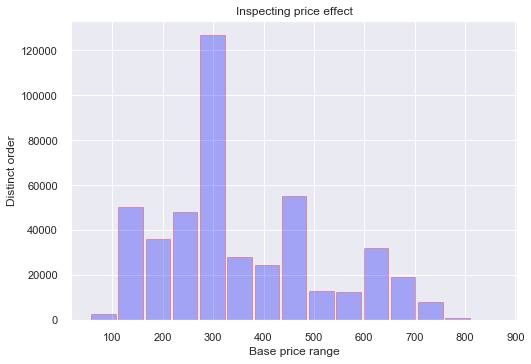

In [22]:
#plotting histogram 
plt.hist(df['base_price'],rwidth=0.9,alpha=0.3,color='blue',bins=15,edgecolor='red') 

#x and y-axis labels 
plt.xlabel('Base price range') 
plt.ylabel('Distinct order') 

#plot title 
plt.title('Inspecting price effect') 

#display the plot 
plt.show();

I have chosen the number of bins as 15 and it is evident that most of the orders had a base price of ~300.

### 5. Line Plot and Subplots using matplotlib

How are the weekly and monthly sales of the company varying? This is a critical business question that makes or breaks the marketing strategy.

Before exploring that, I will create two lists for storing the week-wise and month-wise revenue of the company

In [23]:
#new revenue column 
df['revenue'] = df.apply(lambda x: x.checkout_price*x.num_orders,axis=1) 

#new month column 
df['month'] = df['week'].apply(lambda x: x//4) 

#list to store month-wise revenue 
month=[] 
month_order=[] 

for i in range(max(df['month'])):
    month.append(i) 
    month_order.append(df[df['month']==i].revenue.sum()) 
    
#list to store week-wise revenue 
week=[] 
week_order=[] 

for i in range(max(df['week'])): 
    week.append(i) 
    week_order.append(df[df['week']==i].revenue.sum())

I will compare the revenue of the company in every week as well as in every month using two line-plots drawn side by side. For this, I will be using the plt.subplots() function.

To understand how this function works, you need to know what Figure, Axes, and Axis are in a matplotlib plot.

Figure is the outermost container for the Matplotlib plot(s). There can a single or multiple plots, called Axes, within a Figure. Each of these Axes contains the x and y-axis known as the Axis.

The plt.subplots() figure returns the figure and axes. You can provide as an input to the function how you want to display the axes within the figure. These will be adjusted using the nrows and ncols parameters. You can even adjust the size of the figure using the figsize parameter.

Axes are returned as a list. To plot for specific axes, you can access them as a list object. The rest of the plotting is done the same way as simple plots:

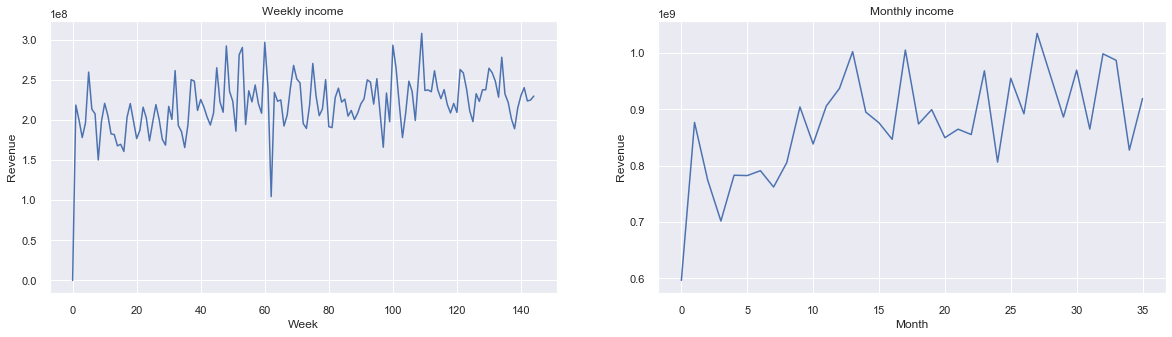

In [24]:
#subplots returns a Figure and an Axes object 
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5)) 

#manipulating the first Axes 
ax[0].plot(week,week_order) 
ax[0].set_xlabel('Week') 
ax[0].set_ylabel('Revenue') 
ax[0].set_title('Weekly income') 

#manipulating the second Axes 
ax[1].plot(month,month_order) 
ax[1].set_xlabel('Month') 
ax[1].set_ylabel('Revenue') 
ax[1].set_title('Monthly income') 

#display the plot  
plt.show();

We can see an increasing trend in the number of food orders with the number of weeks and months, though the trend is not very strong.

### 6. Scatter Plot using matplotlib

Finally, I will try to analyze whether the center type had any effect on the number of orders from different center types. I will do this by comparing a scatter plot, a boxplot and a bar graph in the same figure.

We have already seen the use of boxplots and bar graphs, but scatter plots have their own advantages.

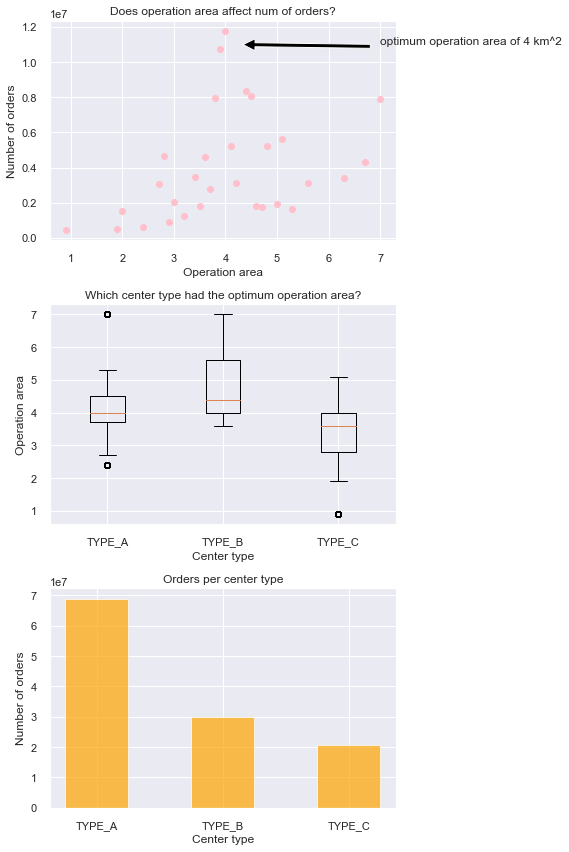

In [25]:
center_type_name = ['TYPE_A','TYPE_B','TYPE_C'] 

#relation between op area and number of orders 
op_table=pd.pivot_table(df,index='op_area',values='num_orders',aggfunc=np.sum) 

#relation between center type and op area 
c_type = {} 
for i in center_type_name: 
    c_type[i] = df[df['center_type']==i].op_area 

#relation between center type and num of orders 
center_table=pd.pivot_table(df,index='center_type',values='num_orders',aggfunc=np.sum) 

#subplots 
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(8,12)) 

#scatter plots 
ax[0].scatter(op_table.index,op_table['num_orders'],color='pink') 
ax[0].set_xlabel('Operation area') 
ax[0].set_ylabel('Number of orders') 
ax[0].set_title('Does operation area affect num of orders?') 
ax[0].annotate('optimum operation area of 4 km^2',xy=(4.2,1.1*10**7),xytext=(7,1.1*10**7),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=12) 

#boxplot 
ax[1].boxplot([x for x in c_type.values()], labels=[x for x in c_type.keys()]) 
ax[1].set_xlabel('Center type') 
ax[1].set_ylabel('Operation area') 
ax[1].set_title('Which center type had the optimum operation area?') 

#bar graph 
ax[2].bar(center_table.index,center_table['num_orders'],alpha=0.7,color='orange',width=0.5) 
ax[2].set_xlabel('Center type') 
ax[2].set_ylabel('Number of orders') 
ax[2].set_title('Orders per center type') 

#show figure 
plt.tight_layout()  
plt.show();

The scatter plot makes it instantly visible that the optimum operation area of a center is 4 km sq. The boxplot shows that the TYPE_A center type had the most number of optimum size centers because of a compact box with a median around 4 km sq. Because of this, they had more orders placed by customers than any other center type.

### 7. HeatMap using matplotlib

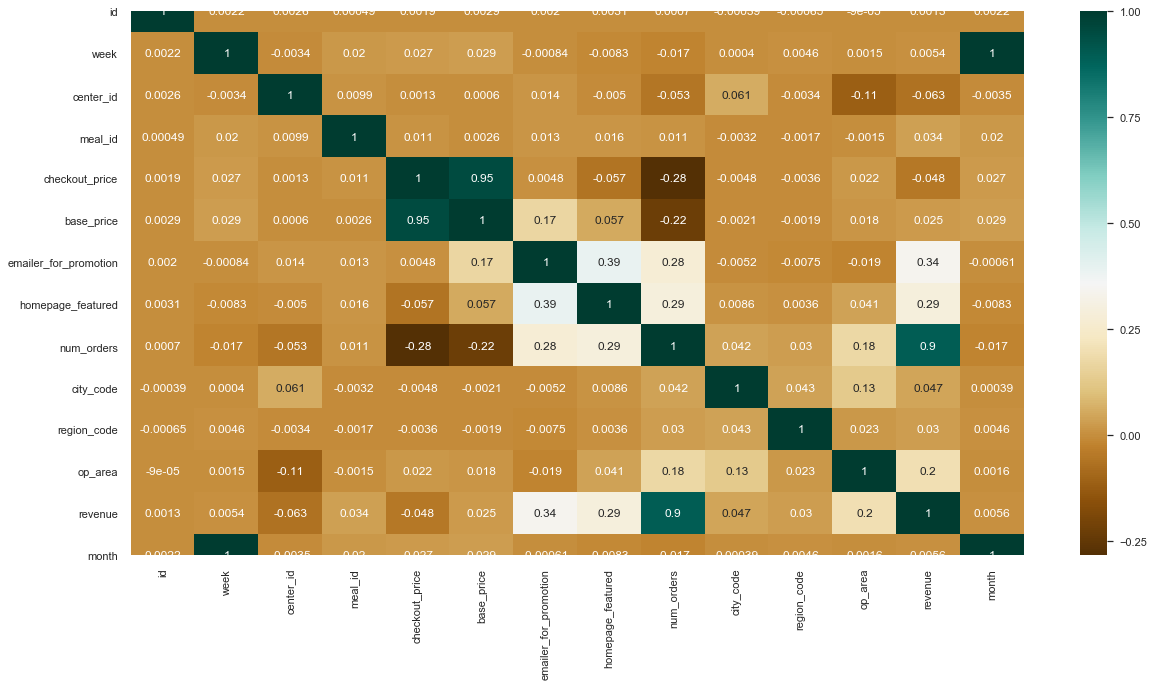

In [28]:
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True,)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

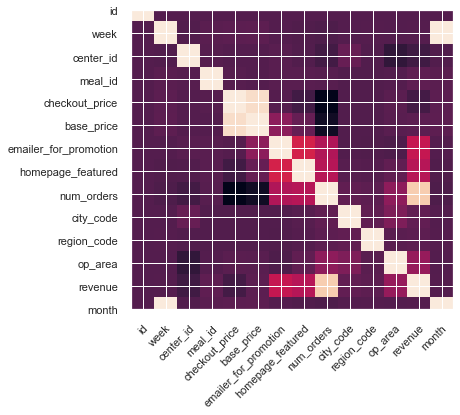

In [29]:
import numpy as np

# get correlation matrix
corr = df.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

### 8. PairPlot using matplotlib

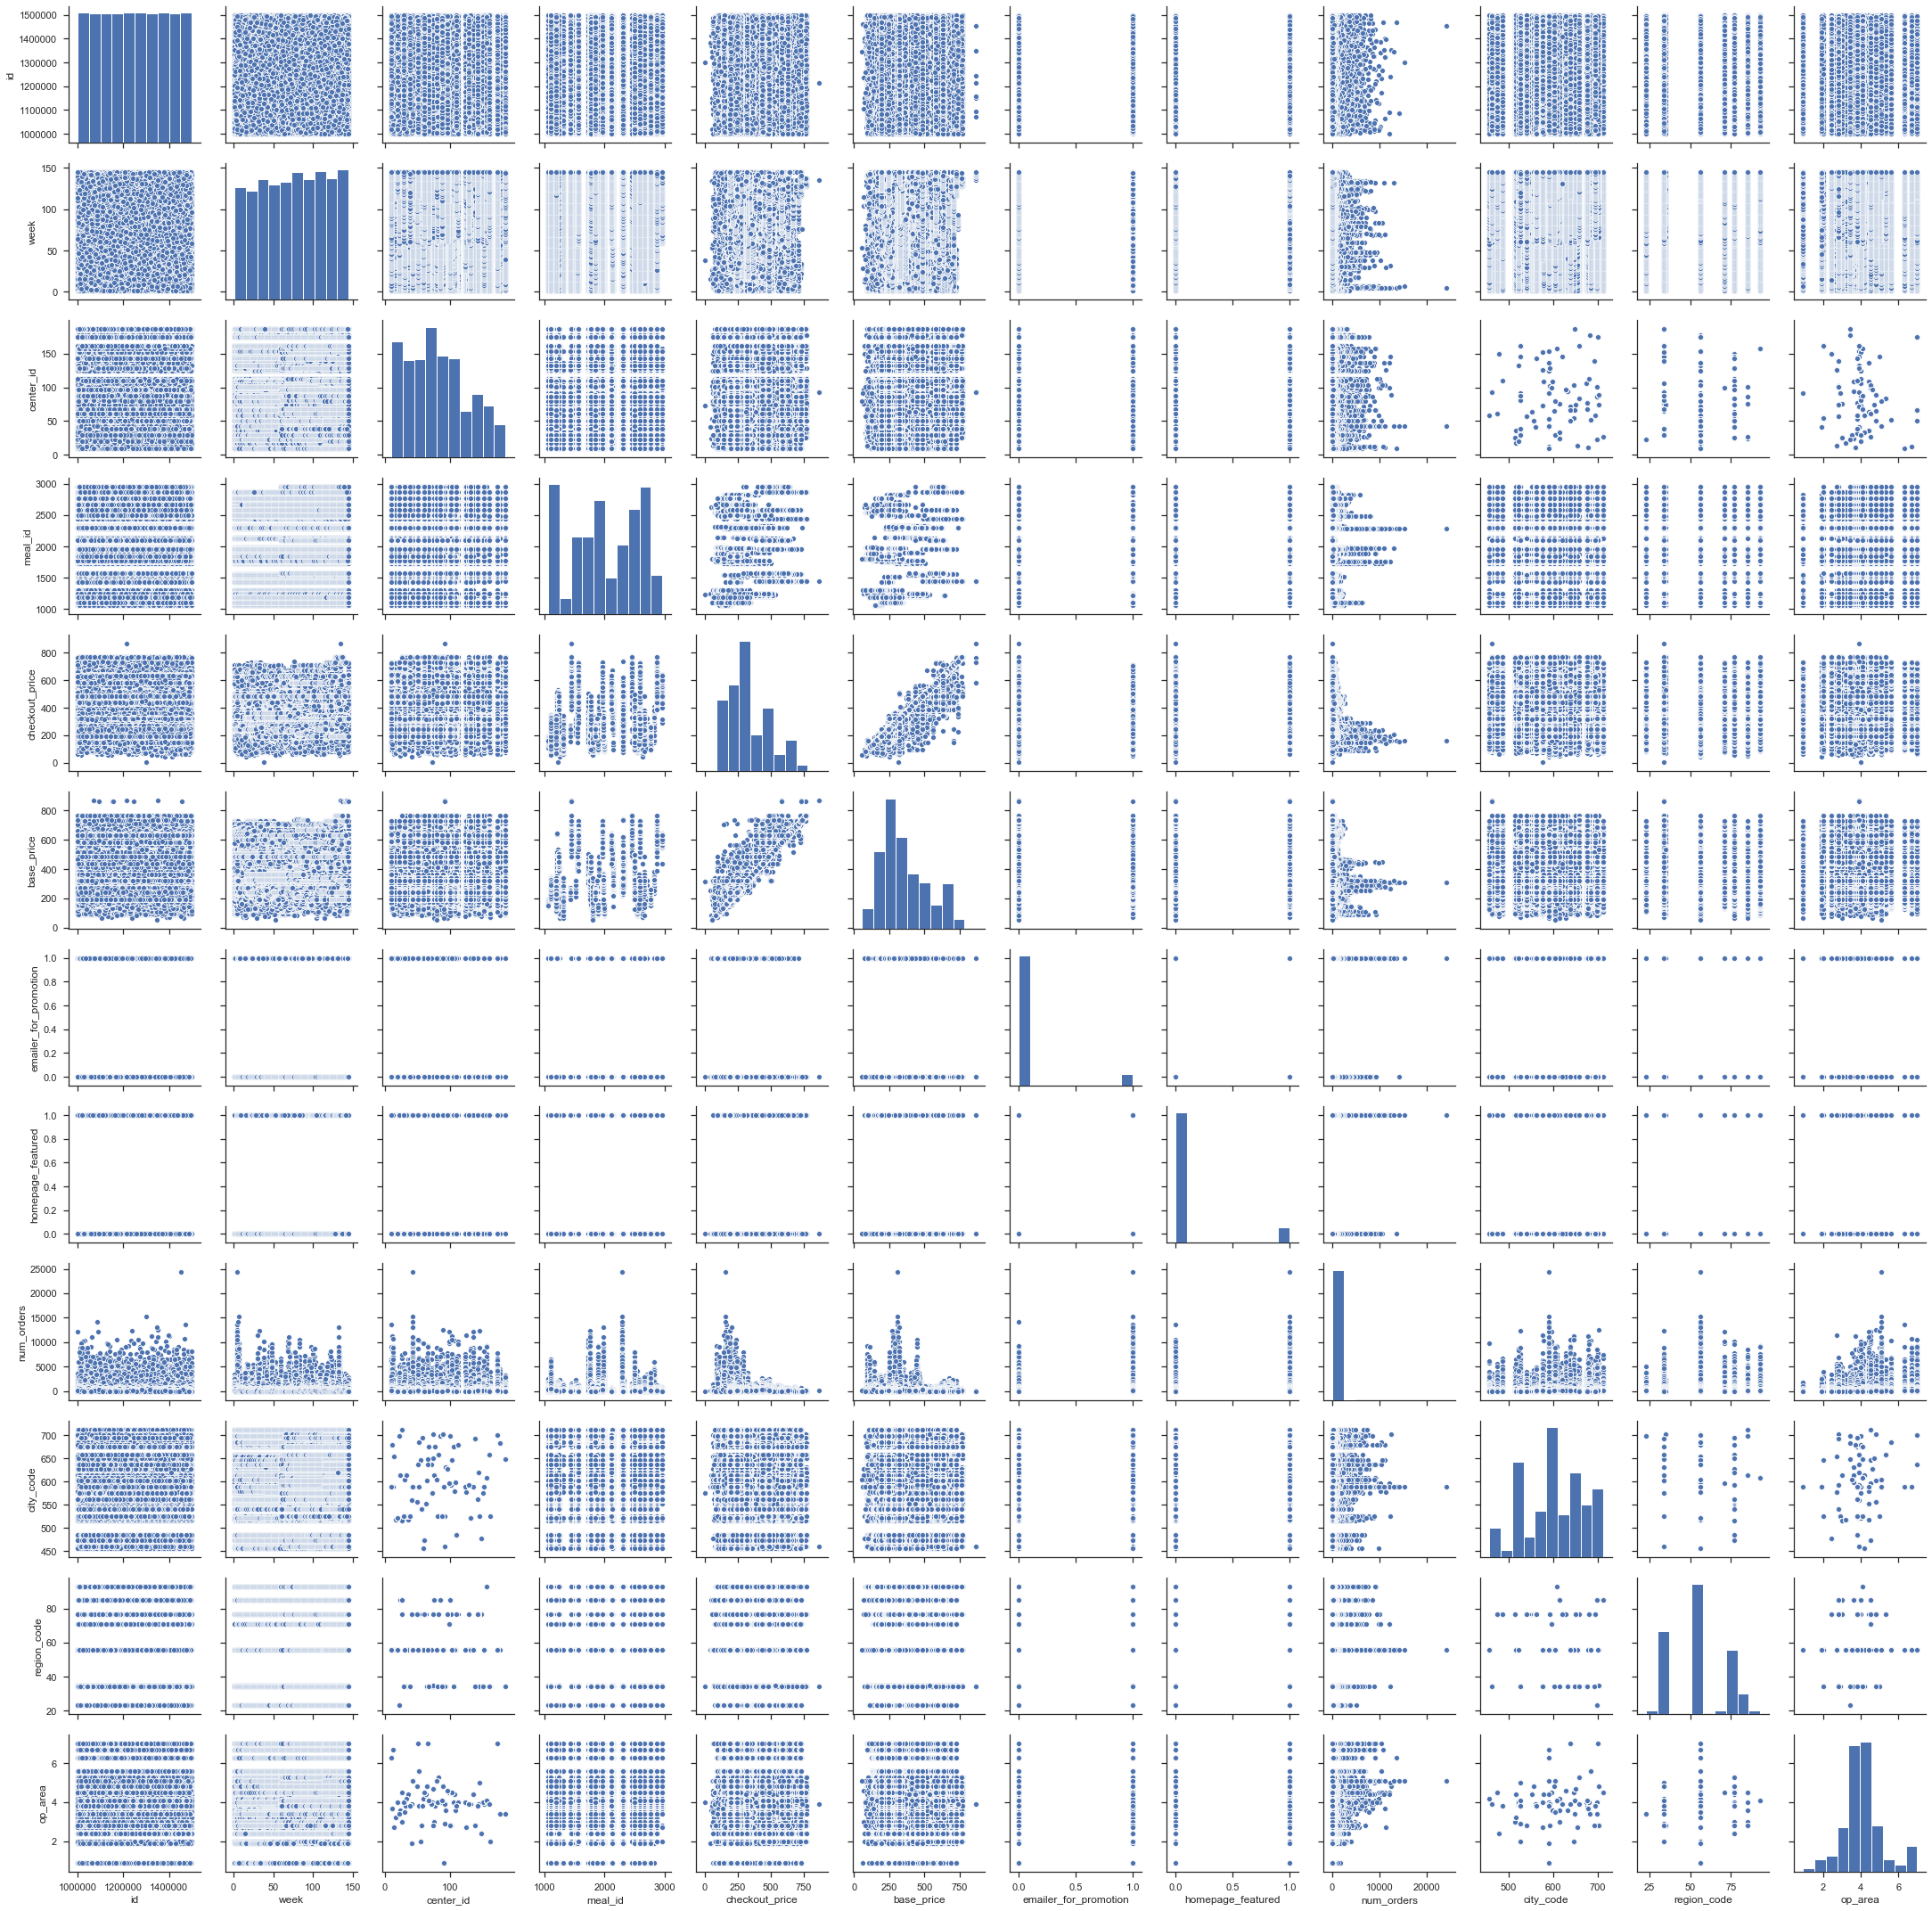

In [6]:
sns.set(style="ticks", color_codes=True)

g=sns.pairplot(df)
plt.show()

### 9.Relational Plot using matplotlib

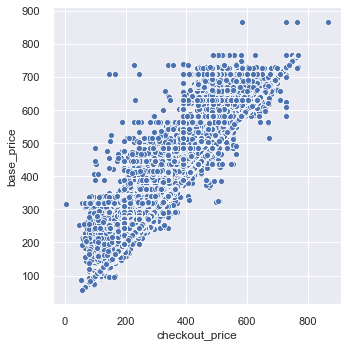

In [31]:
sns.set()
sns.relplot(x="checkout_price", y="base_price", data=df)

### 10. Word Cloud

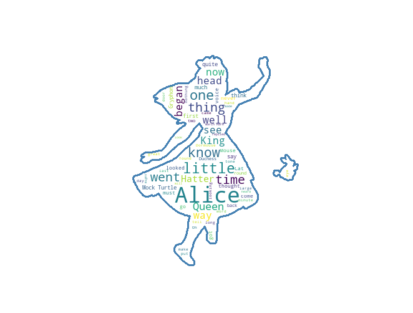

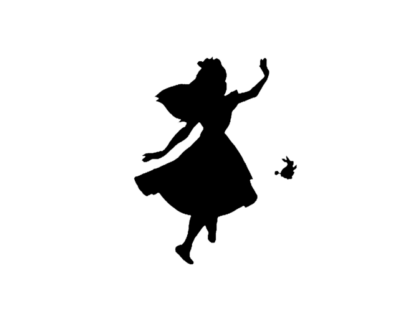

In [32]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'alice.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

## Conclusion
Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.